In [94]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
from torchvision import datasets, transforms
import torchvision
import os
import kagglehub
import random
from PIL import Image

# Download latest version
path = kagglehub.dataset_download("subratasarkar32/low-light-animals")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\subratasarkar32\low-light-animals\versions\2


['animals_low_light', 'name of the animals.txt']

In [17]:
with open(os.path.join(path,"name of the animals.txt"),"r") as f:
    classes=f.read().strip().split('\n')

print(f"Class Names: {classes}")
print(f"Class Count: {len((classes))}")

Class Names: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
Class Count: 90


In [37]:
root_path = os.path.join(path,"animals_low_light","animals_low_light")
os.listdir(root_path)

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [58]:
def show_images(dir,classes=None,seed=None):
    if seed:
        random.seed(seed)
    plt.figure(figsize=(10,6))
    for i in range(9):
        plt.subplot(3,3,i+1)
        class_name = random.choice(os.listdir(dir))
        class_path = os.path.join(dir,class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path,image_name)
        img =  Image.open(image_path)
        plt.imshow(img)
        if classes:
            title = f"Animal type: {class_name}"
        plt.title(title)
        plt.axis(False)
    plt.tight_layout()
    plt.show()

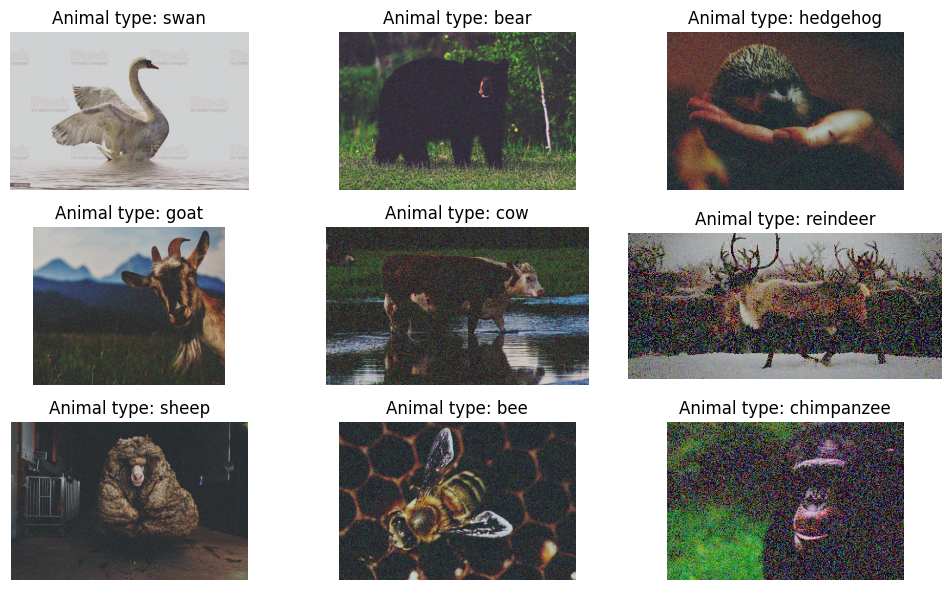

In [59]:
show_images(root_path,classes=classes,seed=42)

In [62]:
transform = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.ImageFolder(root=root_path,transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = 

In [70]:
train_dataset,test_dataset = random_split(dataset=dataset,lengths=[train_size,test_size])
print(f"Length of train: {len(train_dataset)}")
print(f"Length of train: {len(test_dataset)}")

Length of train: 4320
Length of train: 1080


In [71]:
train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=32,shuffle=False)

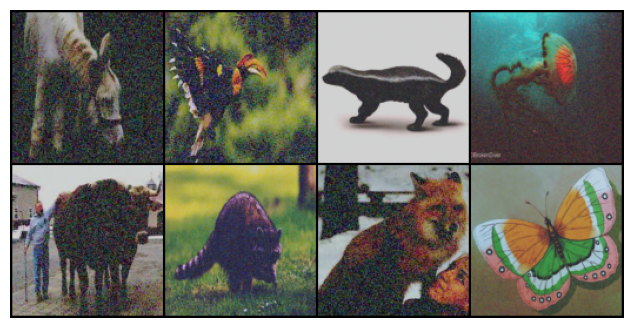

Labels: [20, 37, 1, 41, 57, 67, 27, 8]


In [98]:
img, label = next(iter(train_dataloader))
img = img[:8]  # 
img = torchvision.utils.make_grid(img, nrow=4)  
img = img.permute(1, 2, 0)  

plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis("off")
plt.show()

print("Labels:", label[:8].tolist())


In [131]:
device = "cuda"
def train_step(model,dataloader,loss_fn,optimizer):
    model.train()
    train_loss,train_acc = 0,0
    
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.softmax(y_pred,dim=1).argmax(dim=1)
        train_acc += torch.sum(y_pred_class == y).item()/len(y_pred)
        
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss,train_acc

In [132]:
def test_step(model,dataloader,loss_fn,device=device):
    model.eval()
    
    test_loss,test_acc = 0,0
    
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        test_loss += loss.item()
        
        y_pred_class = torch.softmax(y_pred,dim=1).argmax(dim=1)
        test_acc += torch.sum(y_pred_class == y).item()/len(y_pred)
        
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    
    return test_loss,test_acc

In [133]:
from tqdm.auto import tqdm

def train(model,train_dataloader,test_dataloader,optimizer,loss_fn=nn.CrossEntropyLoss(),epochs=5,device=device):
    results = {"train_loss":[],
               "train_acc":[],
               "test_loss":[],
               "test_acc":[]
               }
    
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = train_step(model,train_dataloader,loss_fn,optimizer)
        test_loss,test_acc = test_step(model,test_dataloader,loss_fn)
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")
          
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [139]:
class Net(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.conv_1_stack = nn.Sequential(
            nn.Conv2d(input_shape,hidden_units,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*64*64,hidden_units*2),
            nn.Linear(hidden_units*2,output_shape)
        )
    def forward(self,x):
        return self.classifier(self.conv_1_stack(x))

In [140]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5

model_0 = Net(input_shape=3,hidden_units=10,output_shape=len(classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.001)

from timeit import default_timer as timer
start_timer = timer()
train_results = train(model_0,train_dataloader,test_dataloader,optimizer,loss_fn,NUM_EPOCHS,device)
end_time = timer()

print(f"Total training time: {end_time-start_timer:.2f} seconds")

 20%|██        | 1/5 [00:58<03:52, 58.06s/it]

Epoch: 0 | Train loss: 4.50896 | Train acc: 0.01273 | Test loss: 4.48285 | Test acc: 0.01379


 40%|████      | 2/5 [01:54<02:51, 57.01s/it]

Epoch: 1 | Train loss: 4.43995 | Train acc: 0.02546 | Test loss: 4.43830 | Test acc: 0.02053


 60%|██████    | 3/5 [02:51<01:53, 56.94s/it]

Epoch: 2 | Train loss: 4.32650 | Train acc: 0.04745 | Test loss: 4.33105 | Test acc: 0.04442


 80%|████████  | 4/5 [03:47<00:56, 56.76s/it]

Epoch: 3 | Train loss: 3.85841 | Train acc: 0.13819 | Test loss: 4.21804 | Test acc: 0.10876


100%|██████████| 5/5 [04:44<00:00, 56.97s/it]

Epoch: 4 | Train loss: 3.01770 | Train acc: 0.30833 | Test loss: 4.28188 | Test acc: 0.14062
Total training time: 284.87 seconds


In [141]:
import torchvision.models as models

# Cihaz seçimi (GPU varsa kullan)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Önceden eğitilmiş modeli yükle (ResNet18)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Son katmanı kendi sınıf sayımıza göre değiştir (örneğin 10 sınıf)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))

# Modeli cihaza taşı
model_pretrained = model.to(device)


torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_pretrained.parameters(),lr=0.001)

from timeit import default_timer as timer
start_timer = timer()
train_results_pretrained = train(model_pretrained,train_dataloader,test_dataloader,optimizer,loss_fn,NUM_EPOCHS,device)
end_time = timer()

print(f"Total training time: {end_time-start_timer:.2f} seconds")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\PC/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 14.9MB/s]
 20%|██        | 1/5 [01:01<04:04, 61.21s/it]

Epoch: 0 | Train loss: 3.87411 | Train acc: 0.12384 | Test loss: 3.51774 | Test acc: 0.16360


 40%|████      | 2/5 [02:01<03:01, 60.50s/it]

Epoch: 1 | Train loss: 2.68178 | Train acc: 0.32407 | Test loss: 3.45250 | Test acc: 0.22580


 60%|██████    | 3/5 [03:02<02:01, 60.86s/it]

Epoch: 2 | Train loss: 1.78197 | Train acc: 0.52569 | Test loss: 4.24344 | Test acc: 0.18995


 80%|████████  | 4/5 [04:05<01:01, 61.57s/it]

Epoch: 3 | Train loss: 1.06007 | Train acc: 0.71134 | Test loss: 3.05744 | Test acc: 0.34344


100%|██████████| 5/5 [05:06<00:00, 61.21s/it]

Epoch: 4 | Train loss: 0.55968 | Train acc: 0.84792 | Test loss: 2.93047 | Test acc: 0.39614
Total training time: 306.03 seconds


In [147]:
import  pandas as pd
model_0_df = pd.DataFrame(train_results)
model_pretrained_df = pd.DataFrame(train_results_pretrained)
model_0_df,model_pretrained_df

(   train_loss  train_acc  test_loss  test_acc
 0    4.508961   0.012731   4.482853  0.013787
 1    4.439946   0.025463   4.438297  0.020527
 2    4.326502   0.047454   4.331050  0.044424
 3    3.858415   0.138194   4.218035  0.108762
 4    3.017705   0.308333   4.281877  0.140625,
    train_loss  train_acc  test_loss  test_acc
 0    3.874108   0.123843   3.517743  0.163603
 1    2.681776   0.324074   3.452504  0.225797
 2    1.781972   0.525694   4.243438  0.189951
 3    1.060072   0.711343   3.057437  0.343444
 4    0.559683   0.847917   2.930472  0.396140)

In [164]:
def plot_results(results,pretrained=False):
    plt.plot(results["train_loss"],label="Train loss")
    plt.plot(results["test_loss"],label="Test loss")
    if pretrained:
        plt.title("Loss vs epochs Pretrained")
    else:
        plt.title("Loss vs epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    plt.plot(results["train_acc"],label="Train accuracy")
    plt.plot(results["test_acc"],label="Test accuracy")
    if pretrained:
        plt.title("Accuracy vs epochs Pretrained")
    else:
            plt.title("Accuracy vs epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

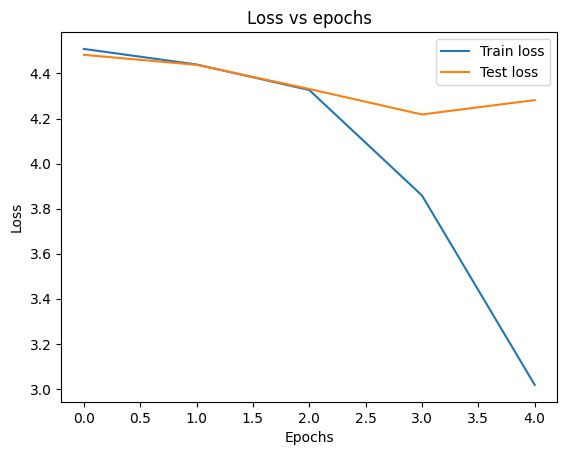

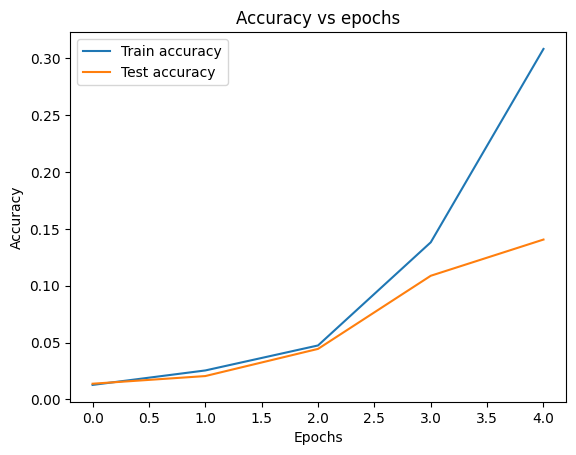

In [165]:
plot_results(train_results)

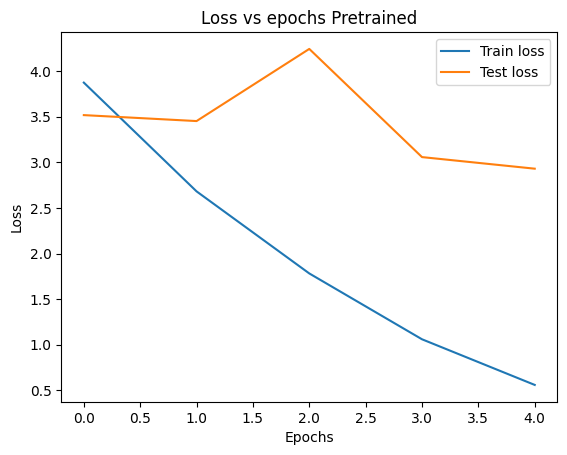

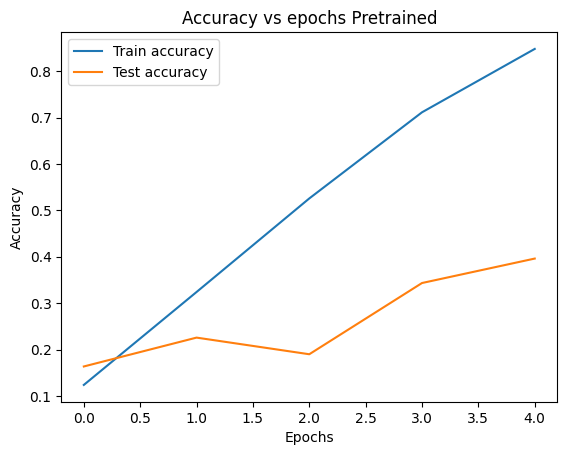

In [166]:
plot_results(train_results_pretrained,pretrained=True)